In [92]:
#impoerting libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns

In [93]:
# loading dataset
dataset = pd.read_csv("weather.csv")
dataset.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [94]:
dataset.isna().sum()
dataset.info()
dataset['Location'].unique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

<Axes: xlabel='RainTomorrow', ylabel='count'>

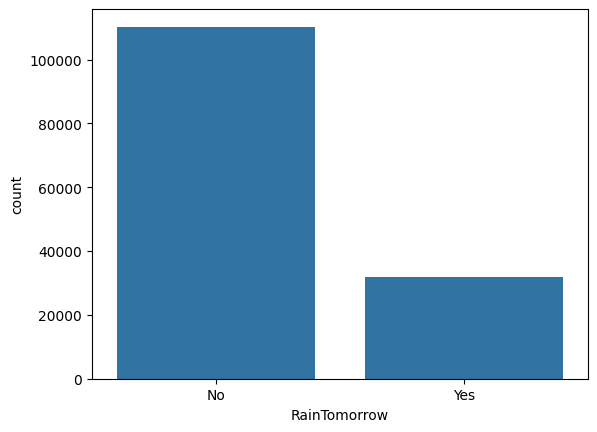

In [95]:
# findout our data is imbalanced or not
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(data= dataset, x=dataset['RainTomorrow'])


<ipython-input-96-b11d95bffc9b>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = dataset.corr()


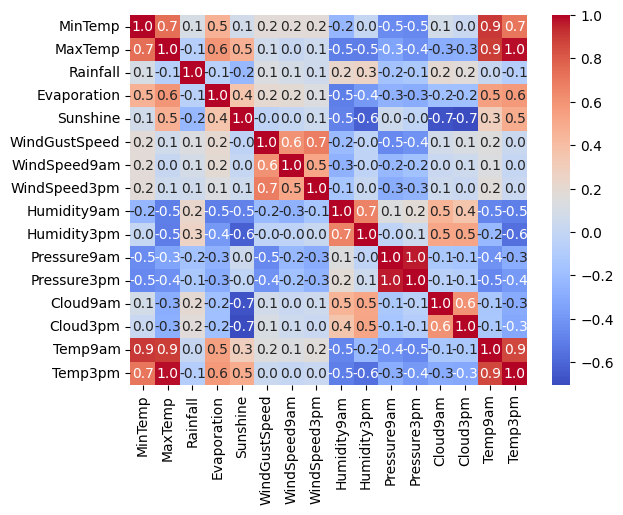

In [96]:
# finding out correlation
correlation_matrix = dataset.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".1f")
plt.show()

In [97]:
# droping relevent columns
dataset = dataset.drop(['Temp9am','Temp3pm'],axis=1)

In [98]:

# converting date object into numerical
dataset['Date']= pd.to_datetime(dataset["Date"])
# label encoding
label_encoder = LabelEncoder()
for i in dataset:
    dataset[i] = label_encoder.fit_transform(dataset[i])

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 21 columns):
 #   Column         Non-Null Count   Dtype
---  ------         --------------   -----
 0   Date           145460 non-null  int64
 1   Location       145460 non-null  int64
 2   MinTemp        145460 non-null  int64
 3   MaxTemp        145460 non-null  int64
 4   Rainfall       145460 non-null  int64
 5   Evaporation    145460 non-null  int64
 6   Sunshine       145460 non-null  int64
 7   WindGustDir    145460 non-null  int64
 8   WindGustSpeed  145460 non-null  int64
 9   WindDir9am     145460 non-null  int64
 10  WindDir3pm     145460 non-null  int64
 11  WindSpeed9am   145460 non-null  int64
 12  WindSpeed3pm   145460 non-null  int64
 13  Humidity9am    145460 non-null  int64
 14  Humidity3pm    145460 non-null  int64
 15  Pressure9am    145460 non-null  int64
 16  Pressure3pm    145460 non-null  int64
 17  Cloud9am       145460 non-null  int64
 18  Cloud3pm       145460 no

In [99]:
dataset['Date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 145460 entries, 0 to 145459
Series name: Date
Non-Null Count   Dtype
--------------   -----
145460 non-null  int64
dtypes: int64(1)
memory usage: 1.1 MB


In [120]:
x = dataset.drop(["RainTomorrow"], axis=1)
y = dataset["RainTomorrow"]

# Splitting test and training sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

x.shape


(145460, 20)

In [109]:
# standard scaler for the features
s_scaler = StandardScaler()
x_train_scaled = s_scaler.fit_transform(x_train)
x_test_scaled=s_scaler.transform(x_test)

In [111]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [116]:
model=Sequential()

#Adding new layers
model.add(Dense(3,kernel_initializer='uniform',activation='relu',input_dim=20))

model.add(Dense(1,activation='relu'))

In [117]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 3)                 63        
                                                                 
 dense_7 (Dense)             (None, 1)                 4         
                                                                 
Total params: 67 (268.00 Byte)
Trainable params: 67 (268.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [122]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [123]:
model.fit(x_train_scaled,y_train,epochs=19,batch_size=32,validation_split=0.2)

Epoch 1/19
2910/2910 [==============================] - 8s 3ms/step - loss: 0.2889 - accuracy: 0.8082 - val_loss: 0.2898 - val_accuracy: 0.8109
Epoch 2/19
2910/2910 [==============================] - 6s 2ms/step - loss: 0.2800 - accuracy: 0.8095 - val_loss: 0.2862 - val_accuracy: 0.8113
Epoch 3/19
2910/2910 [==============================] - 8s 3ms/step - loss: 0.2793 - accuracy: 0.8107 - val_loss: 0.2795 - val_accuracy: 0.8136
Epoch 4/19
2910/2910 [==============================] - 7s 2ms/step - loss: 0.2974 - accuracy: 0.8074 - val_loss: 0.2933 - val_accuracy: 0.8037
Epoch 5/19
2910/2910 [==============================] - 8s 3ms/step - loss: 0.3047 - accuracy: 0.8097 - val_loss: 0.3397 - val_accuracy: 0.8076
Epoch 6/19
2910/2910 [==============================] - 6s 2ms/step - loss: 0.2939 - accuracy: 0.8080 - val_loss: 0.2815 - val_accuracy: 0.8146
Epoch 7/19
2910/2910 [==============================] - 8s 3ms/step - loss: 0.2775 - accuracy: 0.8107 - val_loss: 0.2777 - val_accuracy:

In [125]:
# Calclulating Accuracy 
test_loss, test_accuracy = model.evaluate(x_test_scaled, y_test)
print("Test Accuracy:", test_accuracy)

test_loss, train_accuracy = model.evaluate(x_train_scaled, y_train)
print("Train Accuracy:", train_accuracy)

910/910 [==============================] - 2s 2ms/step - loss: 0.2884 - accuracy: 0.8094
Test Accuracy: 0.8093634247779846
3637/3637 [==============================] - 5s 1ms/step - loss: 0.2900 - accuracy: 0.8133
Train Accuracy: 0.8132991790771484
